In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
dat = np.loadtxt('dbug.dat')
print dat.shape
L = dat.shape[1]
s1 = dat[:L]
r = dat[L:2*L]
s2 = dat[2*L:]

(384, 128)


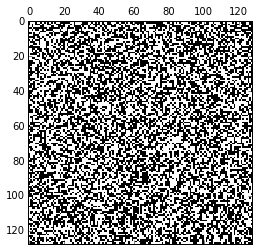

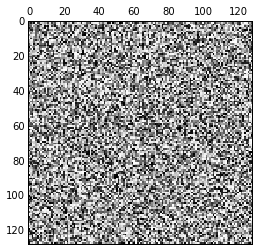

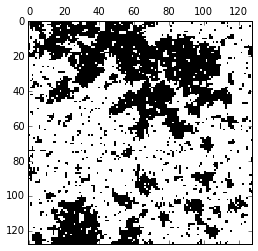

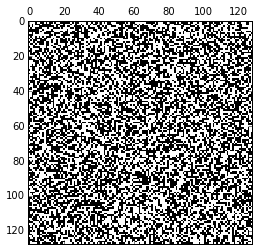

In [20]:
plt.matshow(s1, cmap='Greys')
plt.matshow(r, cmap='Greys')
plt.matshow(s2, cmap='Greys')
plt.matshow(s2 == s1, cmap='Greys')

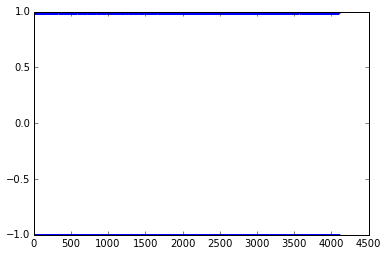

In [11]:
plt.plot(s2.ravel(),'.')

In [16]:
2./np.log(1+np.sqrt(2))

2.2691853142130221

In [5]:
(-1)%16

15